In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [180]:
df = pd.read_csv("1970-2021_DISASTERS.xlsx - emdat data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO                              14644 non-null  object 
 12  Region            

In [181]:
# Disaster Type이 Drought(가뭄)인 데이터만 추출
drought_df_0 = df[df['Disaster Type']=='Drought']
drought_df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 7 to 14615
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           685 non-null    object 
 1   Year                             685 non-null    int64  
 2   Seq                              685 non-null    int64  
 3   Glide                            89 non-null     object 
 4   Disaster Group                   685 non-null    object 
 5   Disaster Subgroup                685 non-null    object 
 6   Disaster Type                    685 non-null    object 
 7   Disaster Subtype                 684 non-null    object 
 8   Disaster Subsubtype              0 non-null      object 
 9   Event Name                       0 non-null      object 
 10  Country                          685 non-null    object 
 11  ISO                              685 non-null    object 
 12  Region                   

In [182]:
# 결측치 확인
drought_df_0.isna().sum()

Dis No                               0
Year                                 0
Seq                                  0
Glide                              596
Disaster Group                       0
Disaster Subgroup                    0
Disaster Type                        0
Disaster Subtype                     1
Disaster Subsubtype                685
Event Name                         685
Country                              0
ISO                                  0
Region                               0
Continent                            0
Location                           125
Origin                             532
Associated Dis                     432
Associated Dis2                    645
OFDA Response                      553
Appeal                             537
Declaration                        467
Aid Contribution                   653
Dis Mag Value                      634
Dis Mag Scale                        0
Latitude                           685
Longitude                

In [183]:
# 재해번호, 나라, 대륙, 가뭄 발생 연도추출 / 인덱스 초기화
drought_df = drought_df_0[['Start Year', 'Country','Continent']].reset_index(drop=True)
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Start Year  685 non-null    int64 
 1   Country     685 non-null    object
 2   Continent   685 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.2+ KB


In [184]:
drought_df.columns=['가뭄 발생 연도', '나라', '대륙']
drought_df.head()

,가뭄 발생 연도,나라,대륙
0,1970,Brazil,Americas
1,1970,Botswana,Africa
2,1971,Afghanistan,Asia
3,1971,Cameroon,Africa
4,1971,Ghana,Africa


In [185]:
df_year = drought_df.groupby('가뭄 발생 연도').count()['나라']
df_year

가뭄 발생 연도
1970     2
1971     6
1972     4
1973     2
1974     4
1975     1
1976     6
1977    16
1978     9
1979    11
1980    14
1981    13
1982    13
1983    32
1984     8
1985     3
1986     4
1987    15
1988    17
1989     7
1990    12
1991    18
1992    12
1993     9
1994    13
1995     6
1996     6
1997    18
1998    20
1999    23
2000    27
2001    22
2002    25
2003    14
2004    11
2005    20
2006     9
2007    11
2008    16
2009    18
2010    17
2011    17
2012    21
2013     9
2014    18
2015    29
2016    14
2017    12
2018    16
2019    16
2020     9
2021    10
Name: 나라, dtype: int64

In [186]:
year_list = df_year.index.to_list()
num_list = list(df_year.values)

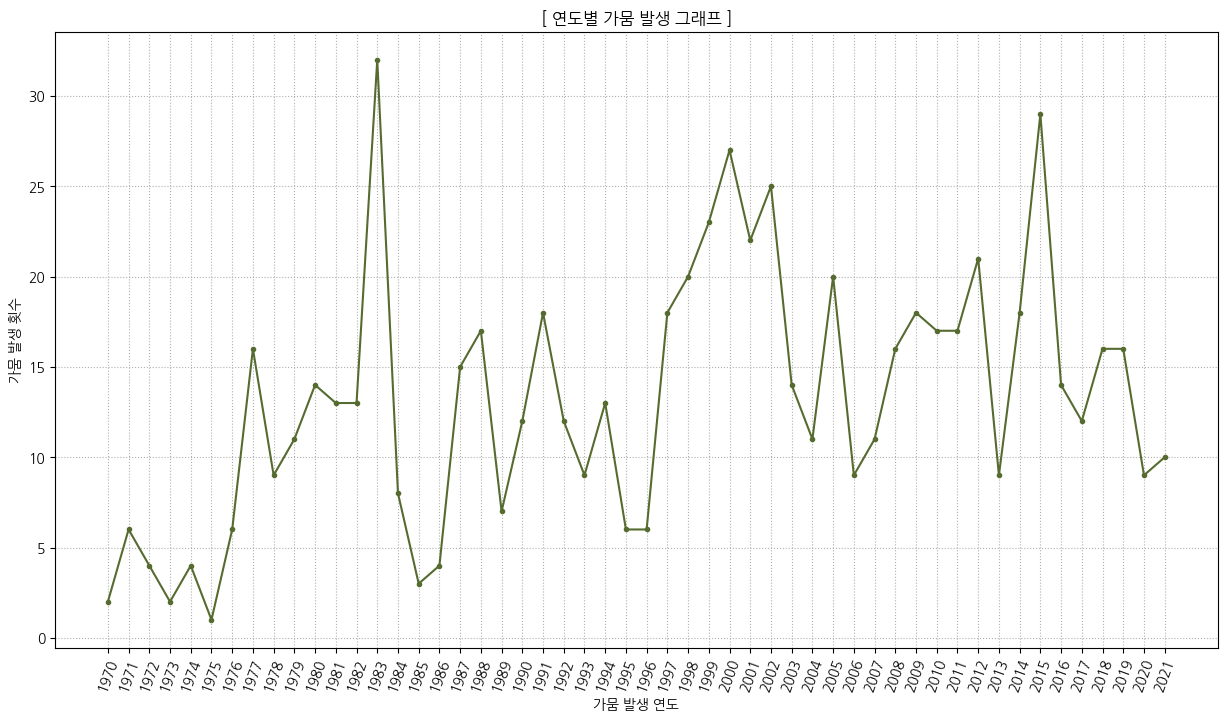

In [222]:
plt.figure(figsize=(15,8))
plt.plot(year_list,num_list,color='darkolivegreen',marker='.')
plt.xticks(year_list, rotation=70)
plt.grid(linestyle=':')
plt.xlabel('가뭄 발생 연도')
plt.ylabel('가뭄 발생 횟수')
plt.title('[ 연도별 가뭄 발생 그래프 ]')
plt.show()